# Lab 3: Spam detection problem

This lab is built on the top of the previous lab. Make sure you finishd your Lab2 before starting this notebook.

## Install and import numpy, pandas, scikit-learn and matplotlib

In [1]:
!pip install numpy pandas scikit-learn matplotlib
import numpy as np
import pandas as pd
import sklearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 925.8 kB/s eta 0:00:00 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 3.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/var/folders/7r/5l3qk64j0xgc5vs_9ldbb5r00000gn/T/ipykernel_89340/2574864966.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load the csv database 

Hint: Make sure you load it wit latin-1 encoding.

You can also try to inspect the dataset using Ms. Excel. 

In [7]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## print out the first 10 rows of your dataset

In [8]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## show the shape of your dataframe (dataset)

In [10]:
df.shape

(5572, 5)

# 1. Data Cleaning

## show all the infor of each column

In [12]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Unamed: x columns are not needed, so drop them all. 

In [16]:
df.drop(df.columns[[2, 3, 4]], axis=1, inplace=True)
df.columns

Index(['v1', 'v2'], dtype='object')

## Show the first 10 rows again to make sure those columns are gone

In [17]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## To make it more explicit, let's rename the columns as following: 

1. V1 becomes 'target'
2. v2 becomes 'text'

In [29]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

## Show first 10 rows again to see if they have been renamed

In [30]:
df.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# 2. Data Transformation

Machine learning only works with number, we have to transform our textual data into numeral data. To do this: 


- we will use LabelEncoder to transform our target (or label)
- Bog of words to transform our input text

## Let's start with label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## Now transform our text into numeral features too

## fit and transform means: 

- fit: assign each each textual label to a numerical class (ex. 1, 2, 3...)
- transform: transform each textual label into numeral class


In [36]:
df['target'] = encoder.fit_transform(df['target'])

## Show the first 10 rows again to see if the label have been changed

In [37]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## There might be some duplicated text. Make sure you drop them and keep only unique sample by using "drop_duplicates" funtion

In [38]:
df = df.drop_duplicates(keep='first')

In [39]:
df.duplicated().sum()

0

In [40]:
df.shape

(5169, 2)

## Now transform our input text into features

We will use tfidfVectorizer to do this. Please read it here: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

The idea is pretty simple: 

1. For any word in English
2. We will assign a unique ID to it
3. For each document (email or sms), we will count the number of words that appear in that document.
4. Each word has different weights in the decision process. For example, "to" has no influence at all for any task, but "politic" has a lot of influence if we are classifying political document vs non-political document. This is where TFIDF comes into practices. 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()

In [42]:
print(X.shape)
print(X[0])

(5169, 3000)
[0. 0. 0. ... 0. 0. 0.]


## Now initialize our y variable to be our target

In [43]:
y = df['target'].values

# 2. Data Exploration

In [44]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

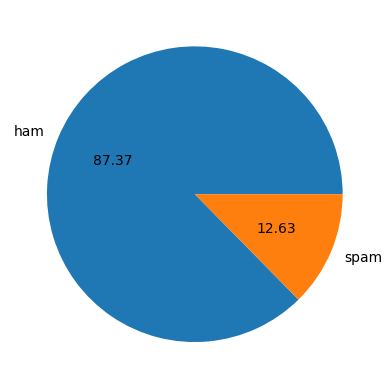

In [45]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()
# Data is imbalanced

# 3. Model Building

## Initialize our linear model. We will use RidgetClassifier

In [45]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

## now start training it

In [46]:
model.fit(X, y)
y_pred = model.predict(X)


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.9951634745598762


# Now repeat everything again, but: 

1. Properly split your dataset into train and test set. Train on train set and evaluate on test set. Report the accuracy vs the accuracy you got here. What is your conclusion?

2. We have set the number of features to be 3000. Please change it to 1000, 5000 and 10000. Re-run everything again, do you obtain the same performance? Why?

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RidgeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

for max_features in [1000, 5000, 10000]:
    tfidf = TfidfVectorizer(max_features=max_features)
    X = tfidf.fit_transform(df['text']).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy with {max_features} features: {accuracy:.4f}")

Test set accuracy: 0.9836
Test set accuracy with 1000 features: 0.9855
Test set accuracy with 5000 features: 0.9816
Test set accuracy with 10000 features: 0.9787
